In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import numpy as np

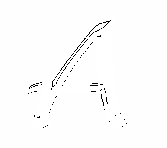

In [126]:
from PIL import Image
import numpy as np

# Open the image file
image = Image.open('download.png')

# Convert the image to grayscale
image = image.convert('L')

# Convert image to numpy array
image_array = np.array(image)
size = image_array.shape

# Pad the image array
image_array = np.pad(image_array, ((1, 1), (1, 1)), mode='constant', constant_values=0)

# Define the outline matrix
outline_matrix = np.array([[-0.25, -0.5, -0.25], [0, 9, 0], [0.25, 0.5, 0.25]])

def cell_value(width, height):
    cell = 0
    for i in range(height - 1, height + 2):
        for j in range(width - 1, width + 2):
            product = image_array[i][j] * outline_matrix[i - (height - 1)][j - (width - 1)]
            cell += 255 if product > 127.4 else 0
    return cell

# Compute the modified array
modified_array = []
for i in range(1, size[0] + 1):
    w_array = []
    for j in range(1, size[1] + 1):
        w_array.append(cell_value(j, i))
    modified_array.append(w_array)

# Convert modified array to numpy array
modified_array_np = np.array(modified_array)

# Create the modified image
modified_image = Image.fromarray(modified_array_np.astype('uint8'))

modified_image
